In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\datasets\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending _Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending _Score_(1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                 200 non-null int64
Gender                     200 non-null object
Age                        200 non-null int64
Annual Income (k$)         200 non-null int64
Spending _Score_(1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)         0
Spending _Score_(1-100)    0
dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending _Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending _Score_(1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending _Score_(1-100),0.013835,-0.327227,0.009903,1.000000


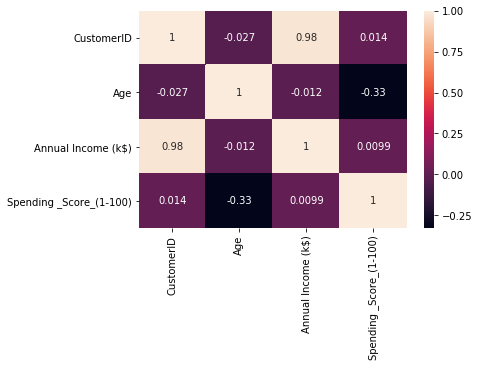

In [11]:
sns.heatmap(df.corr(),  annot=True)

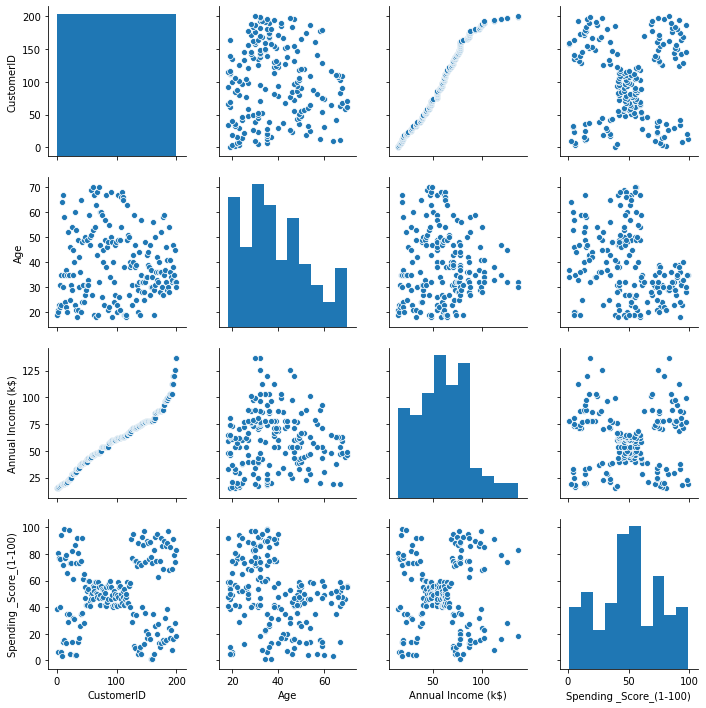

In [12]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001412DEB1DD8>,
      dtype=object)

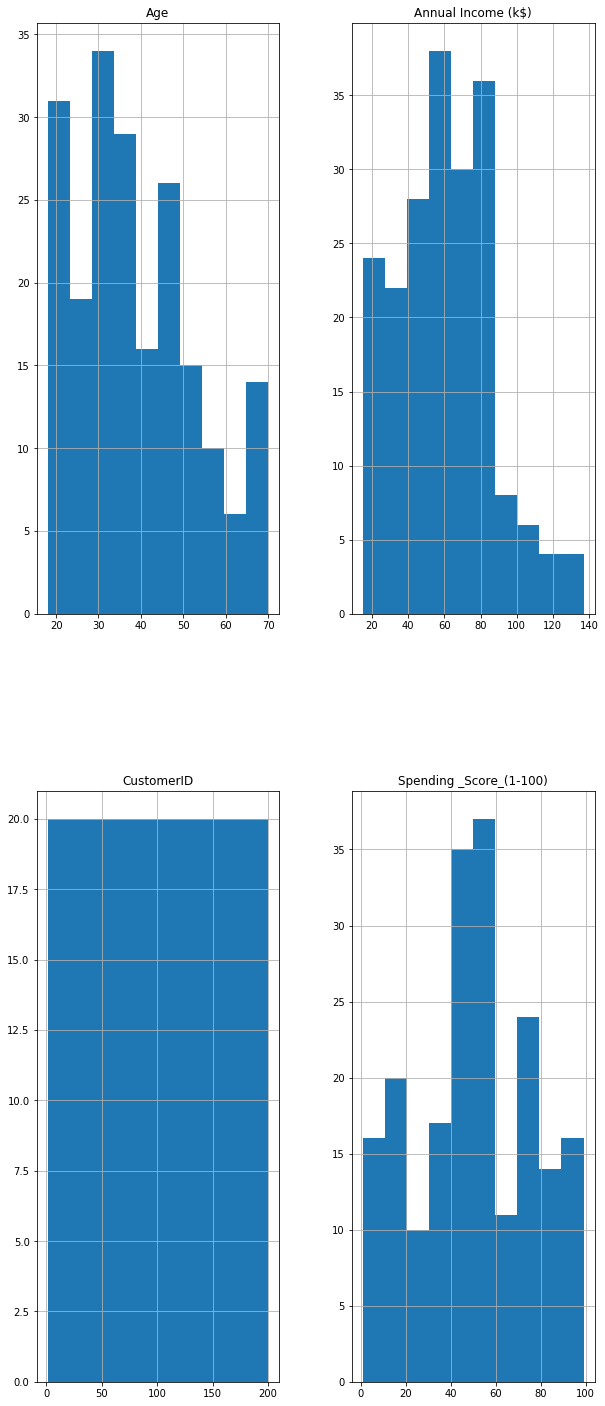

In [13]:
df.hist(figsize=(10, 25))

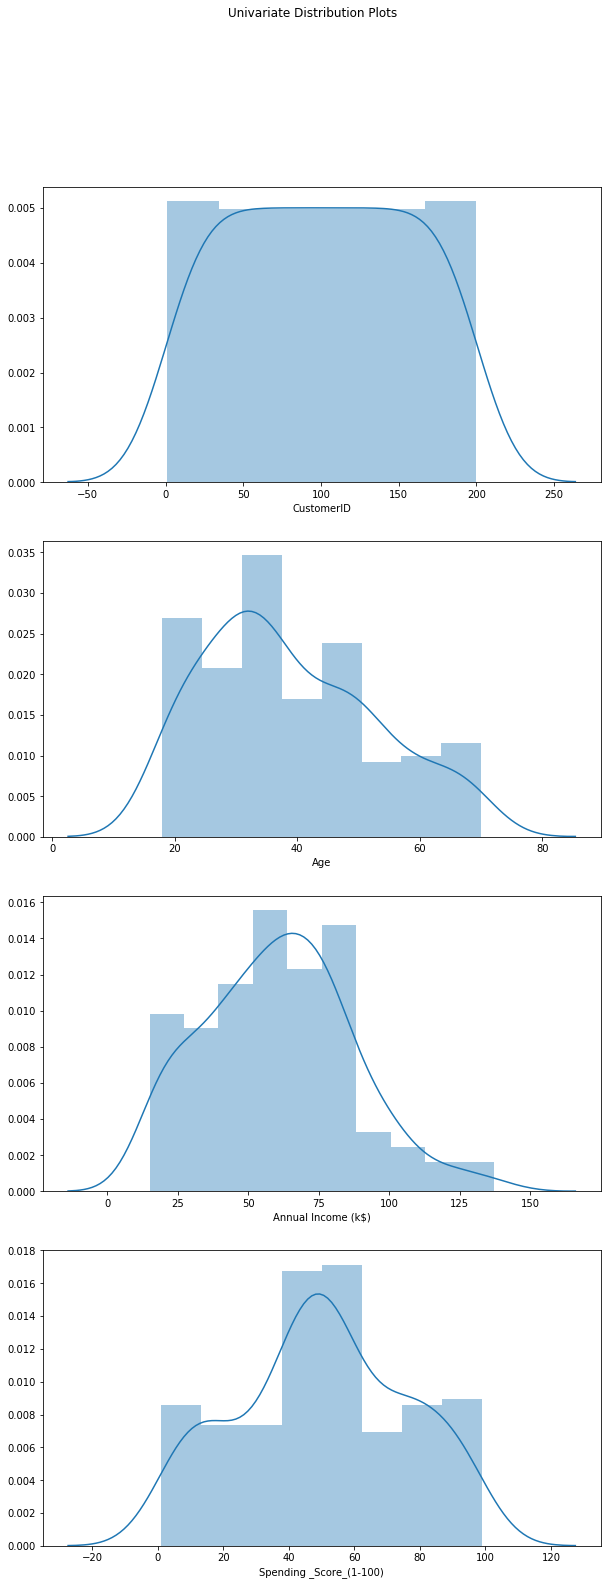

In [14]:
numeric_columns = df.select_dtypes(include="number").columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1 ,figsize=(10, 25))
for i, column in enumerate(numeric_columns):
    sns.distplot(df[column], ax=axes[i])
fig.suptitle("Univariate Distribution Plots")
axes[0].set_xlabel(numeric_columns[0])
axes[-1].set_xlabel(numeric_columns[-1])
plt.show()

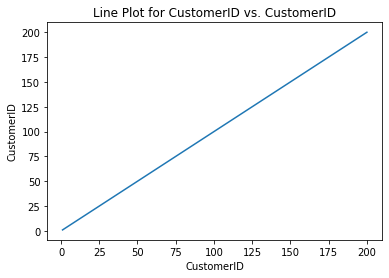

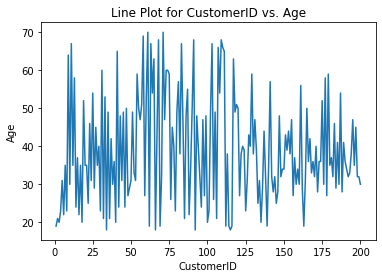

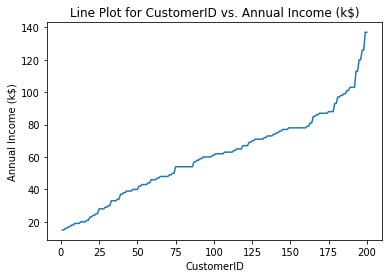

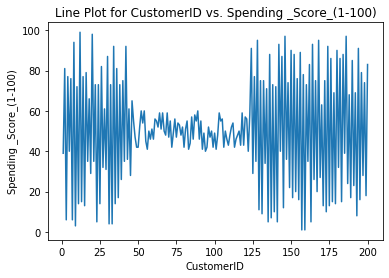

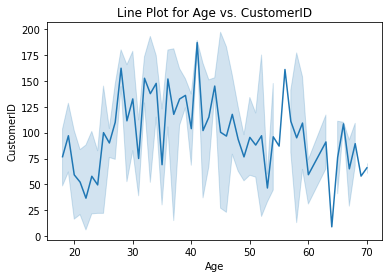

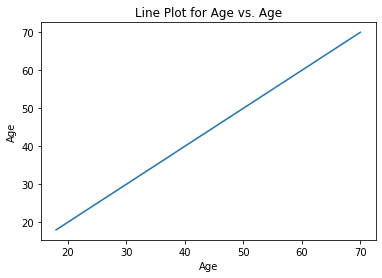

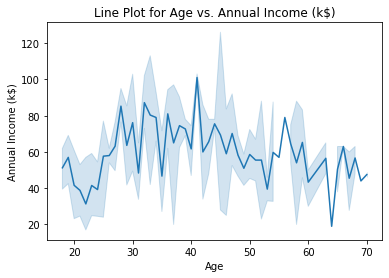

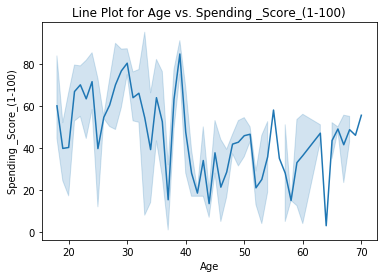

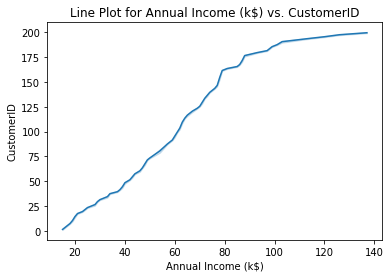

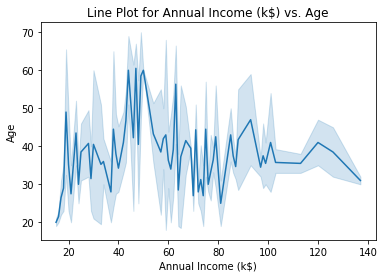

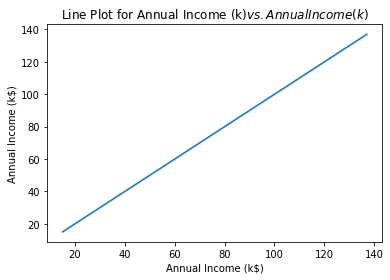

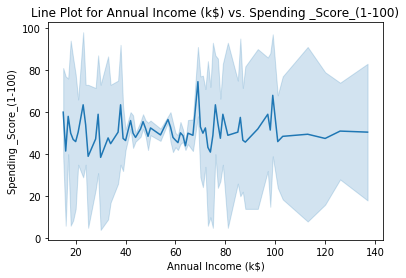

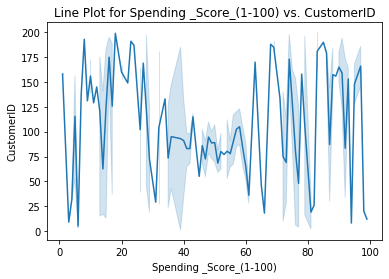

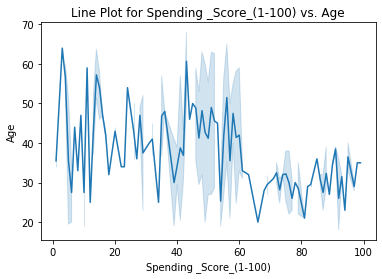

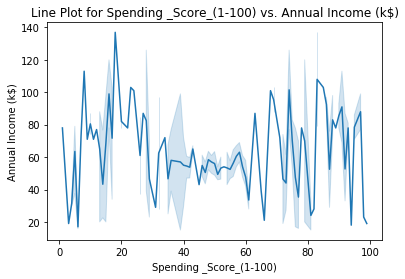

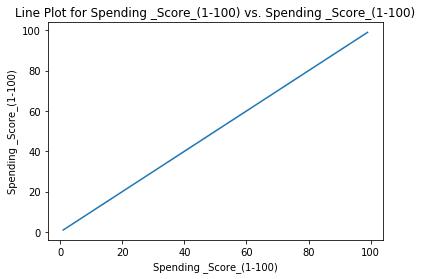

In [15]:
numeric_columns = df.select_dtypes(include="number").columns
for column_1 in numeric_columns:
    for column_2 in numeric_columns:
        sns.lineplot(x=df[column_1], y=df[column_2])
        plt.title("Line Plot for {} vs. {}".format(column_1, column_2))
        plt.xlabel(column_1)
        plt.ylabel(column_2)
        plt.show()

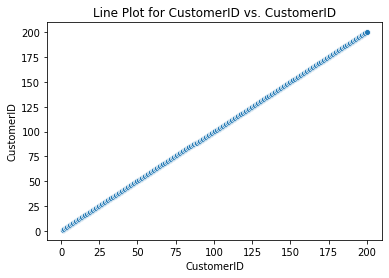

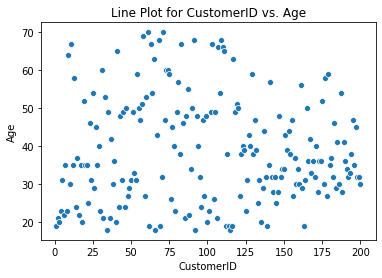

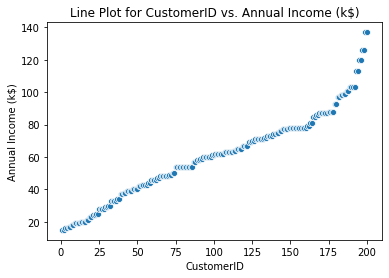

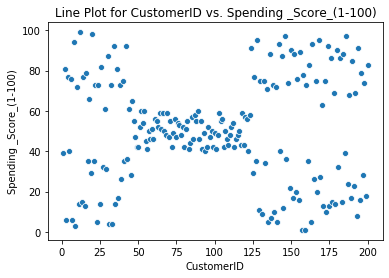

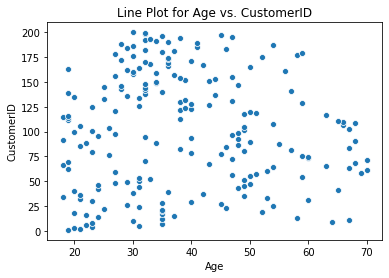

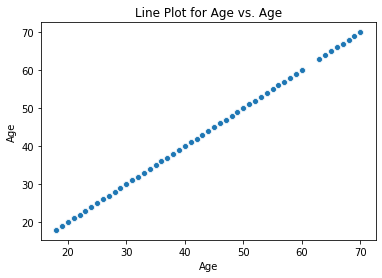

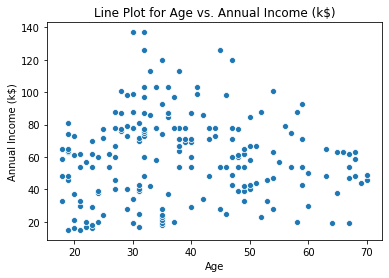

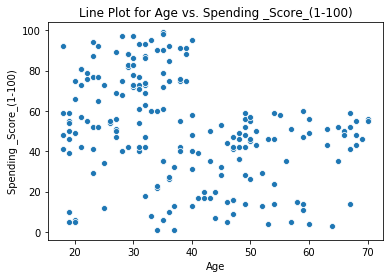

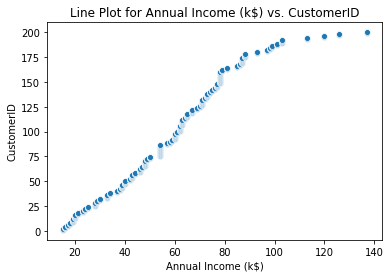

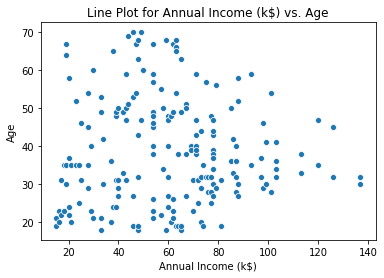

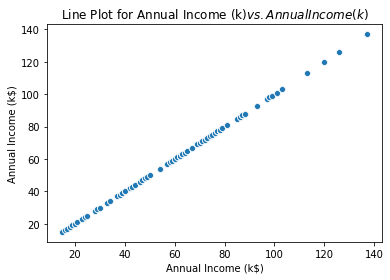

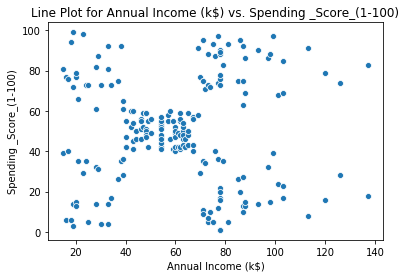

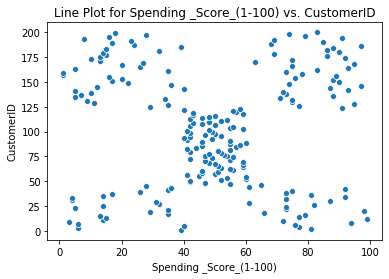

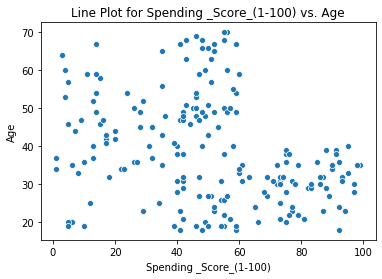

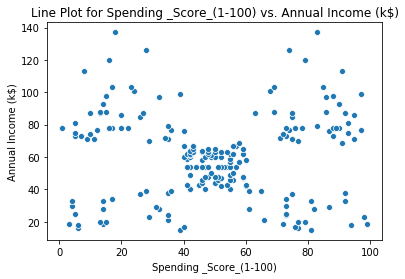

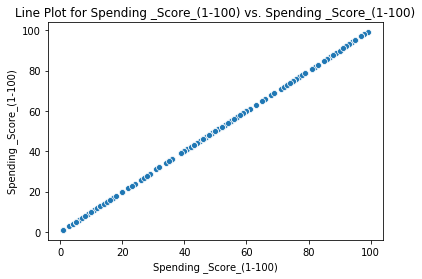

In [16]:
numeric_columns = df.select_dtypes(include="number").columns
for column_1 in numeric_columns:
    for column_2 in numeric_columns:
        sns.scatterplot(x=df[column_1], y=df[column_2])
        plt.title("Line Plot for {} vs. {}".format(column_1, column_2))
        plt.xlabel(column_1)
        plt.ylabel(column_2)
        plt.show()

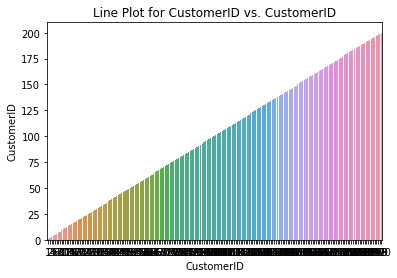

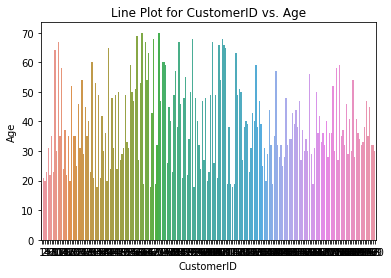

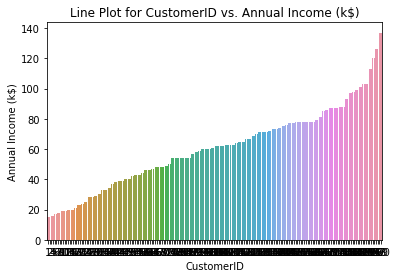

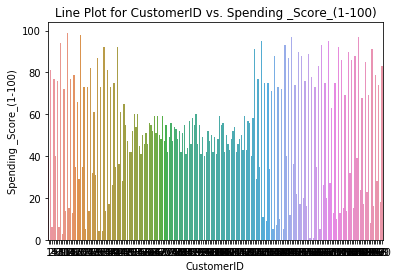

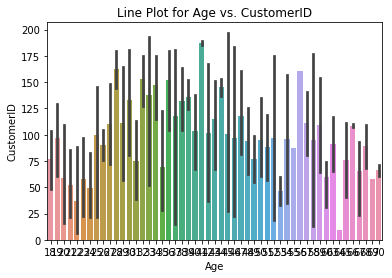

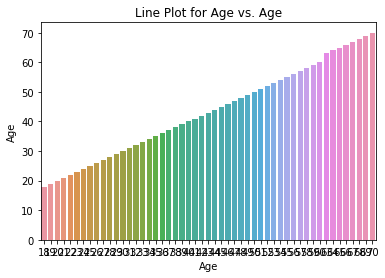

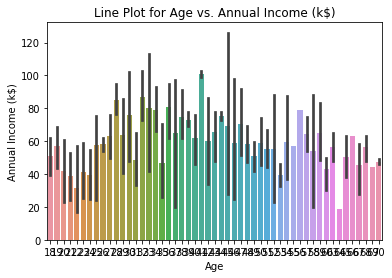

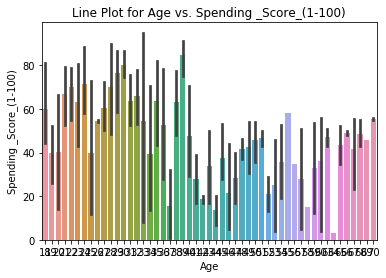

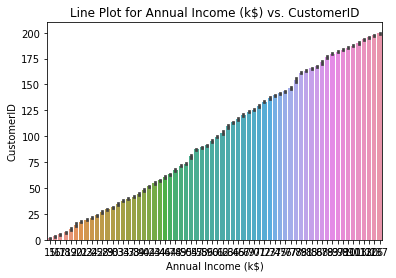

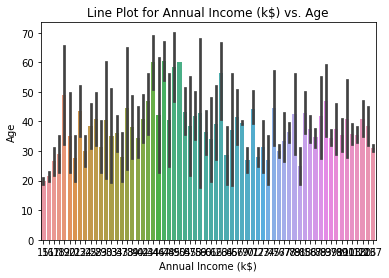

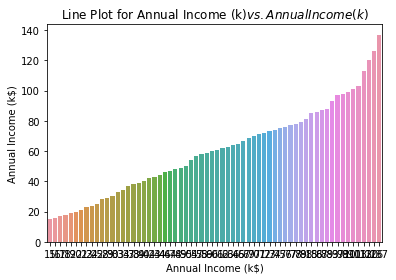

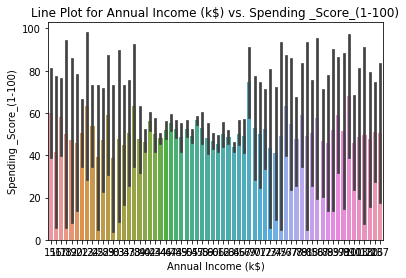

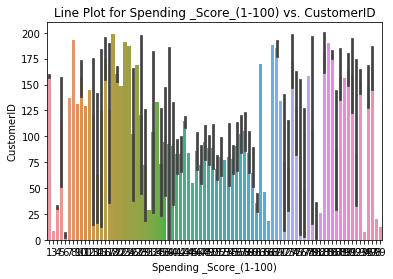

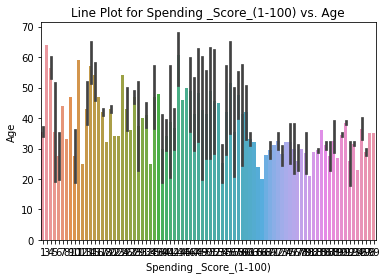

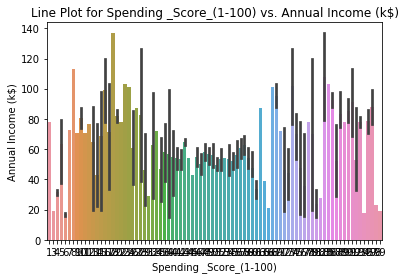

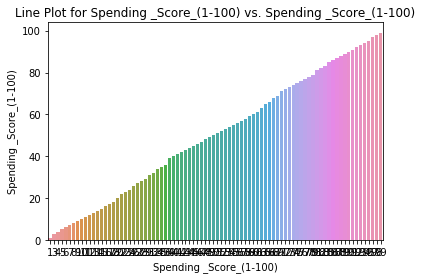

In [17]:
numeric_columns = df.select_dtypes(include="number").columns
for column_1 in numeric_columns:
    for column_2 in numeric_columns:
        sns.barplot(x=df[column_1], y=df[column_2])
        plt.title("Line Plot for {} vs. {}".format(column_1, column_2))
        plt.xlabel(column_1)
        plt.ylabel(column_2)
        plt.show()

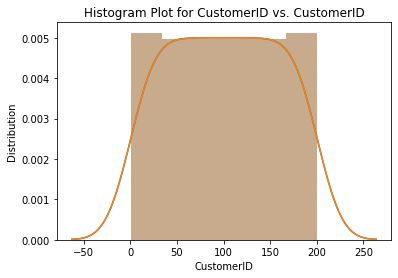

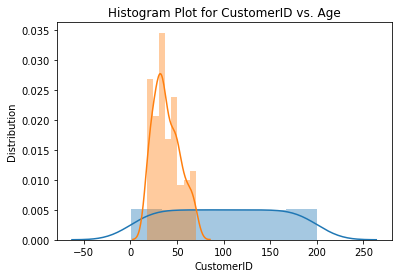

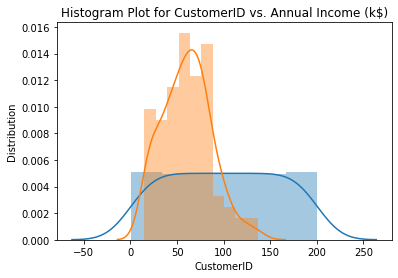

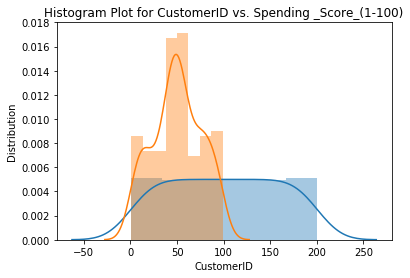

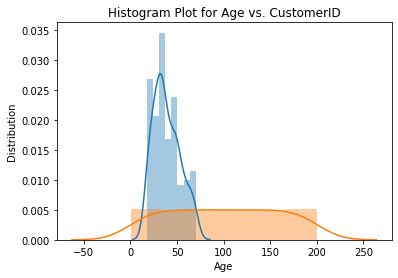

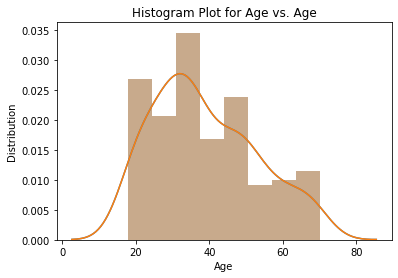

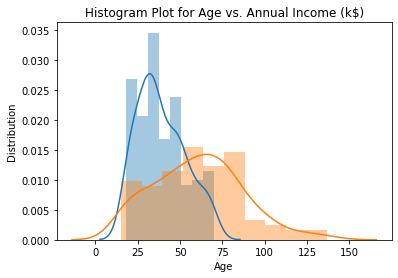

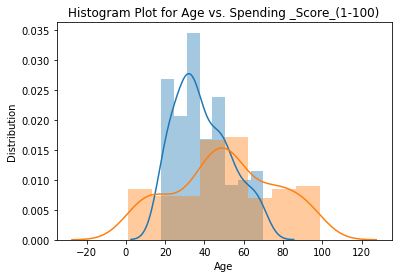

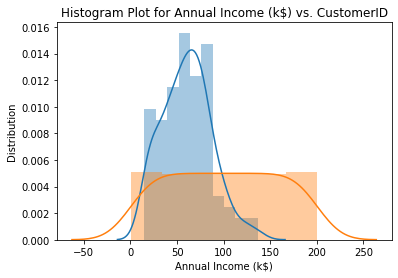

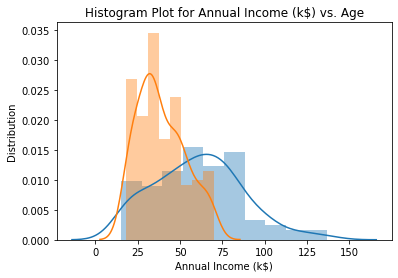

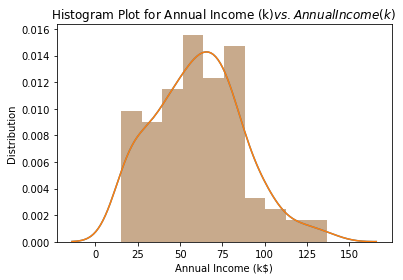

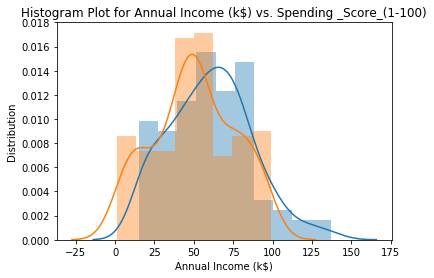

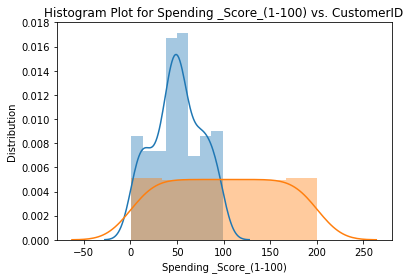

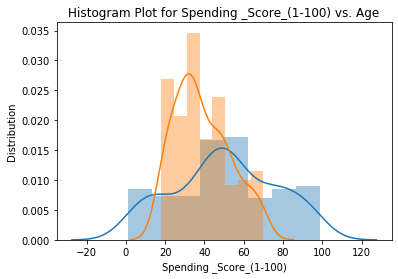

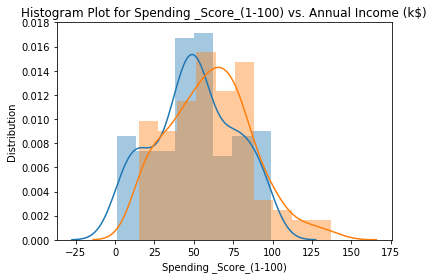

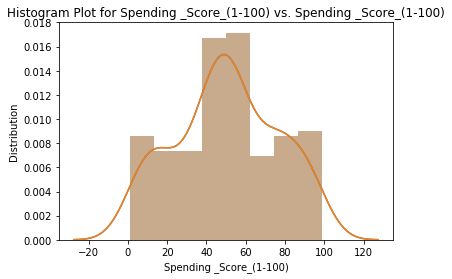

In [18]:
numeric_columns = df.select_dtypes(include="number").columns
for column_1 in numeric_columns:
    for column_2 in numeric_columns:
        sns.distplot(df[column_1], label=column_1)
        sns.distplot(df[column_2], label=column_2)
        plt.title("Histogram Plot for {} vs. {}".format(column_1, column_2))
        plt.xlabel(column_1)
        plt.ylabel("Distribution")
        plt.show()

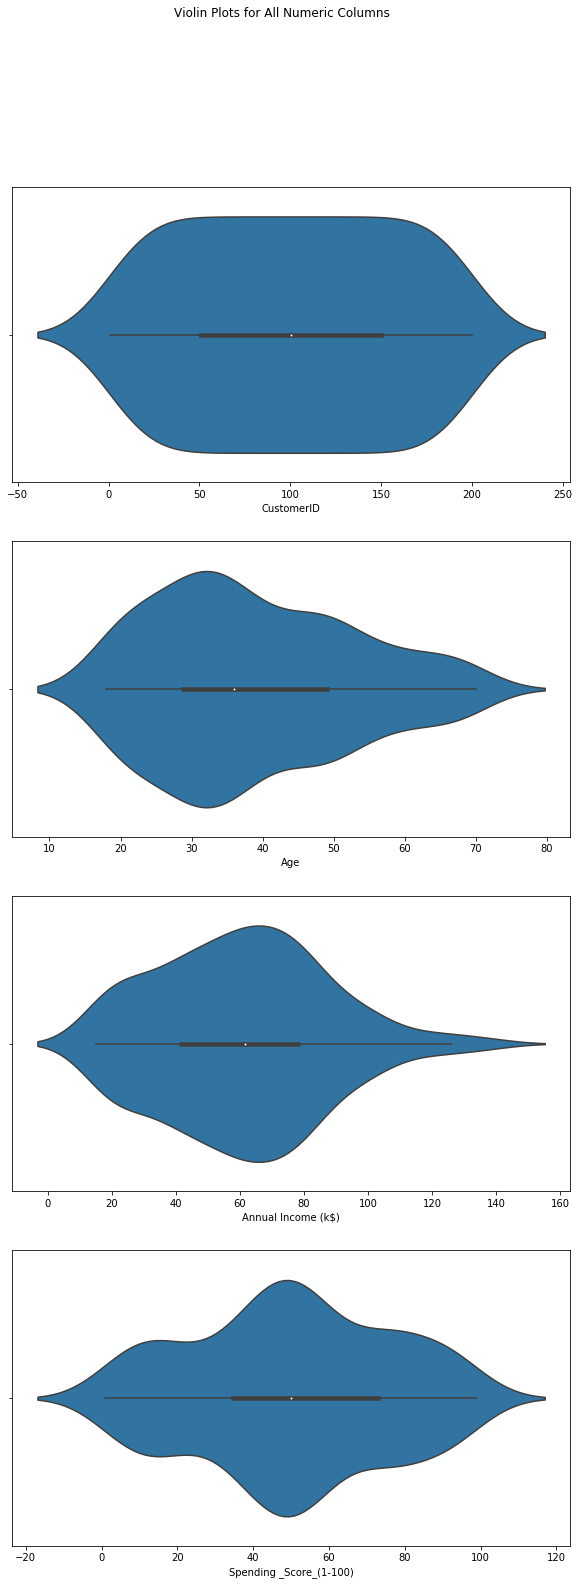

In [19]:
numeric_columns = df.select_dtypes(include="number").columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1 ,figsize=(10, 25) )
for i, column in enumerate(numeric_columns):
    sns.violinplot(x=df[column], ax=axes[i])
fig.suptitle("Violin Plots for All Numeric Columns")
axes[0].set_xlabel(numeric_columns[0])
axes[-1].set_xlabel(numeric_columns[-1])
plt.show()

In [21]:
from sklearn import cluster

In [22]:
df1 = df.iloc[:,-2:]
df1.head()

,Annual Income (k$),Spending _Score_(1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=4)
  kmeans.fit(df1)
  error.append(kmeans.inertia_)

C:\Users\lenovo\Desktop\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [26]:
error

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25061.26409229069,
 21964.472678238857,
 19641.456216651568]

In [28]:
import matplotlib.pyplot as plt

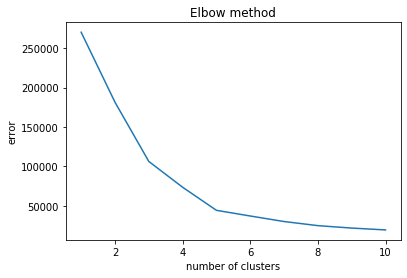

In [29]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [31]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)
km_model.fit(df1)

KMeans(n_clusters=5, random_state=0)

In [33]:
pred = km_model.predict(df1)
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [36]:
km_model.predict([[80,70]])

C:\Users\lenovo\Desktop\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2])

In [37]:
km_model.predict([[18,9]])

C:\Users\lenovo\Desktop\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([4])

In [38]:
km_model.predict([[1,4]])

C:\Users\lenovo\Desktop\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([4])

In [40]:
km_model.predict([[1,367]])

C:\Users\lenovo\Desktop\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([3])